In [13]:
import numpy as np
import matplotlib.pyplot as plt  
from scipy.optimize import curve_fit


# Analytics of Cavity, Qubit Dispersive Model
From [Blais cQED paper](https://journals.aps.org/rmp/pdf/10.1103/RevModPhys.93.025005)

In [ ]:
class CavityQubit():
    def __init__(self, Nq = 8, Nc = 100, wc = 5000, wa = 3500, Ec = 0, g = 100, kappa = 0, gamma = 0 ): # all in MHz
        self.N = N
        self.wc = wc
        self.wa = wa
        self.g = g
        self.kappa = kappa
        self.gamma = gamma
        self.Ec = Ec # anharmonicity

    def chi_neighbor_level_shift(self, j):
        '''
        Neighbor level shift j from j-1
        '''
        if j == 0:
            return 0
        else:
            return -j * self.g**2 / (self.wa - self.Ec * (j-1) - self.wc)

    def Lambda(self, j = 0): 
        '''
        Qubit level shift 
        '''
        if j == 0:
            return 0
        else: 
            return self.chi_neighbor_level_shift(j)
        
    def total_chi_shift(self, j = 0):
        '''
        Total level shift
        '''
        return self.chi_neighbor_level_shift(j) - self.chi_neighbor_level_shift(j+1)
    
    def level_energy(self, j = 0, n = 0):
        '''
        Level energy
        qubit level - j 
        cavity level - n
        '''
        return self.wc * n + self.wa * j + self.Lambda(j) + self.Ec * j * (j-1) / 2 + self.total_chi_shift(j) * n
    
    def plot_level_energy(self, jmax = 5, nmax = 10):
        '''
        Plot level energy
        '''
        x = np.linspace(0, 10, 100)
        y = [self.level_energy(j, n) for n in x]
        plt.plot(x, y)
        plt.xlabel('n')
        plt.ylabel('Energy')
        plt.title('Level Energy')
        plt.show()  


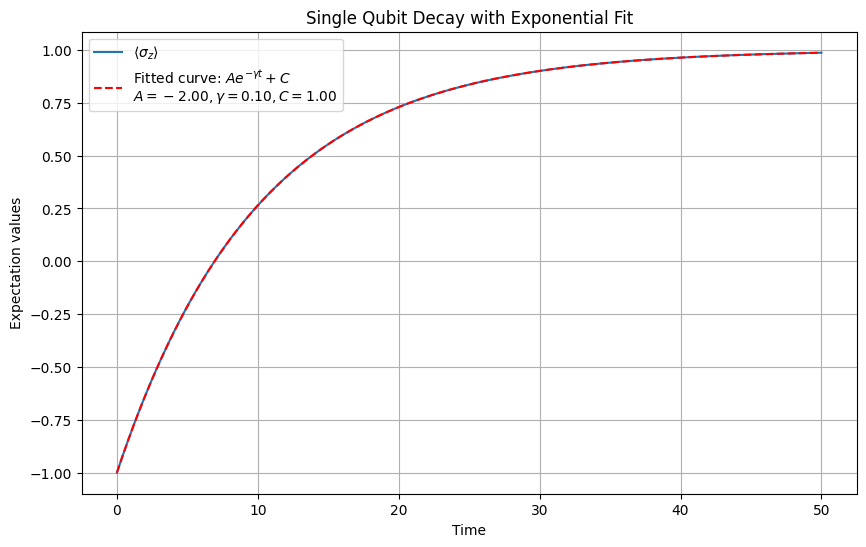

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Define system parameters
decay_rate = 1/10/2/np.pi  * (2*np.pi)  # Decay rate gamma

# Create the initial state (excited state)
initial_state = basis(2, 1)  # |1>

# Define the Hamiltonian (zero for pure decay)
H = 0 * sigmax() #1 * sigmaz() #0 * sigmax()

# Define the collapse operators (decay process)
c_ops = [np.sqrt(decay_rate) * sigmap()]

# Define the time list
tlist = np.linspace(0, 50, 500)

# Solve the master equation
result = mesolve(H, initial_state, tlist, c_ops, [sigmax(), sigmay(), sigmaz()])

# Extract the expectation values
x = result.expect[0]
y = result.expect[1]
z = result.expect[2]

# Define the exponential decay function
def exp_decay(t, A, gamma, C):
    return A * np.exp(-gamma * t) + C

# Fit the z expectation value to the exponential decay function
popt, pcov = curve_fit(exp_decay, tlist, z)

# Extract the fitted parameters
A_fit, gamma_fit, C_fit = popt

# Generate the fitted curve
z_fit = exp_decay(tlist, A_fit, gamma_fit, C_fit)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(tlist, z, label=r'$\langle\sigma_z\rangle$')
plt.plot(tlist, z_fit, 'r--', label=f'Fitted curve: $A e^{{-\\gamma t}} + C$\n$A={A_fit:.2f}, \\gamma={gamma_fit:.2f}, C={C_fit:.2f}$')
plt.xlabel('Time')
plt.ylabel('Expectation values')
plt.legend()
plt.title('Single Qubit Decay with Exponential Fit')
plt.grid(True)
plt.show()

In [9]:
sigmap() * basis(2, 1)

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]]